--- Building WL Tree (Convergence Mode: True) ---
-> Stable convergence reached at iteration 4.

--- Validation des Résultats ---
Similar to 5 (delta=0): [6]
Similar to 5 (delta=2): [1, 6]
Similar to 5 (delta=4): [1, 2, 3, 4, 6, 7, 8]
Similar to 2 (delta=0): [8]
Similar to 1 (delta=0): []
Similar to 3 (delta=3): []

Score Similarité (1 vs 5): 0.50


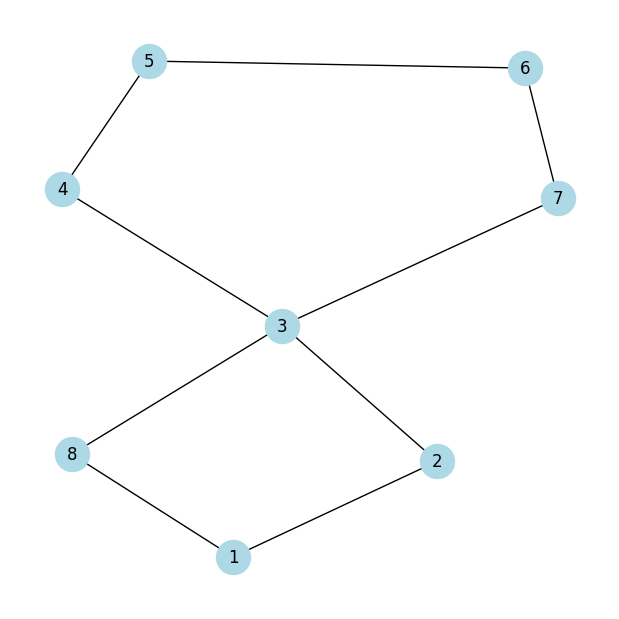

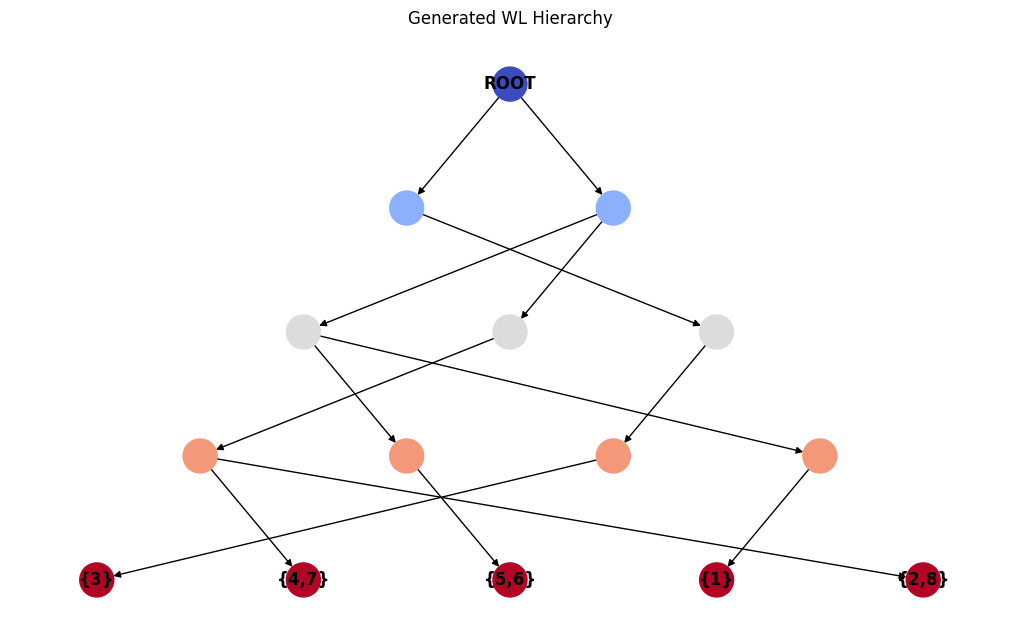

In [1]:
import networkx as nx
from wl import *
import matplotlib.pyplot as plt
# Graph exact du papier (Fig 1a)
# Attention: Les degrés sont v1(2), v2(2), v8(2), v3(4), v4(2), v7(2), v5(2), v6(2)
# Les arêtes doivent être exactes pour reproduire l'arbre.
nodes = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [
    (1, 2), (1, 8), (2, 3), (8, 3), 
    (3, 4), (3, 7), (4, 5), (7, 6), (5, 6)
]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)   # placement lisible et stable
nx.draw(G, pos, with_labels=True, node_size=600, node_color="lightblue")

engine = WLHierarchyEngine(nodes, edges)
# On force la convergence pour avoir la profondeur max (comme le papier)
engine.build_wl_tree(force_convergence=True)

print("\n--- Validation des Résultats ---")

# TEST 1: Node 5 (Bout de la boucle droite)
# Delta 0: Identité parfaite -> [6]
print(f"Similar to 5 (delta=0): {engine.get_similar_nodes(5, delta=0)}")

# Delta 2: Frères (Même parent direct). 
# Dans l'arbre profond du papier, 5 et 6 sont isolés dans leur feuille commune ou parent commun.
# Ils n'ont pas de frères proches car 1 est un Cousin.
print(f"Similar to 5 (delta=2): {engine.get_similar_nodes(5, delta=2)}")

# Delta 4: Cousins (Même Grand-Parent).
# Ici on remonte assez haut pour voir la branche de gauche (Node 1).
print(f"Similar to 5 (delta=4): {engine.get_similar_nodes(5, delta=4)}")

# TEST 2: Node 2 (Connecteur gauche)
print(f"Similar to 2 (delta=0): {engine.get_similar_nodes(2, delta=0)}")

# TEST 3: Node 1 (Bout gauche)
# Il est unique structurellement à la fin (connecté au diamant vs cycle)
print(f"Similar to 1 (delta=0): {engine.get_similar_nodes(1, delta=0)}")

# TEST 4: Node 3 (Centre)
# Unique dès le début (Degré 4)
print(f"Similar to 3 (delta=3): {engine.get_similar_nodes(3, delta=3)}")

# Score de similarité structurelle (1 et 5 sont des 'Hard Positives')
score = engine.get_structural_similarity(1, 5)
print(f"\nScore Similarité (1 vs 5): {score:.2f}")

engine.visualize_hierarchy()


In [2]:
import torch
x = torch.ones((len(nodes), 1), dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

mapping = {node: i for i, node in enumerate(nodes)}
remapped_edges = [(mapping[u], mapping[v]) for u, v in edges]

edge_index = torch.tensor(remapped_edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

C:\Users\Z\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [6]:
from gin_encoder import GINEncoder

encoder = GINEncoder(input_dim=1, hidden_dim=32, output_dim=16, num_layers=3)



In [7]:
import torch.nn.functional as F
with torch.no_grad():
    embeddings = encoder(x, edge_index)

print(f"Shape des features X : {x.shape}")
print(f"Shape de Edge Index : {edge_index.shape}")
print(f"Shape des Embeddings de sortie : {embeddings.shape}")

print("\n--- Exemple de résultats (Avant entrainement) ---")
print(f"Embedding du noeud 1 (Index 0) :\n{embeddings[0][:5]}...") 
print(f"Embedding du noeud 2 (Index 1) :\n{embeddings[1][:5]}...")

sim_2_8 = F.cosine_similarity(embeddings[1].unsqueeze(0), embeddings[7].unsqueeze(0))
print(f"\nSimilarité Cosine entre Noeud 2 et Noeud 8 (Structurellement identiques) : {sim_2_8.item():.4f}")

Shape des features X : torch.Size([8, 1])
Shape de Edge Index : torch.Size([2, 18])
Shape des Embeddings de sortie : torch.Size([8, 16])

--- Exemple de résultats (Avant entrainement) ---
Embedding du noeud 1 (Index 0) :
tensor([-0.2296, -0.3400,  0.3378,  0.0367, -0.1292])...
Embedding du noeud 2 (Index 1) :
tensor([ 0.0706, -0.2344, -0.5389, -0.3824,  0.0886])...

Similarité Cosine entre Noeud 2 et Noeud 8 (Structurellement identiques) : 1.0000


--- Building WL Tree (Convergence Mode: True) ---
-> Stable convergence reached at iteration 4.
--- Démarrage de l'entrainement sur 150 époques ---
Epoch 10/150 | Loss: 3.3764
Epoch 20/150 | Loss: 2.3614
Epoch 30/150 | Loss: 1.9414
Epoch 40/150 | Loss: 2.3883
Epoch 50/150 | Loss: 0.0000
Epoch 60/150 | Loss: 0.0000
Epoch 70/150 | Loss: 0.0000
Epoch 80/150 | Loss: 0.0000
Epoch 90/150 | Loss: 0.0000
Epoch 100/150 | Loss: 0.0000
Epoch 110/150 | Loss: 0.0000
Epoch 120/150 | Loss: 0.0000
Epoch 130/150 | Loss: 0.0000
Epoch 140/150 | Loss: 0.0000
Epoch 150/150 | Loss: 0.0000


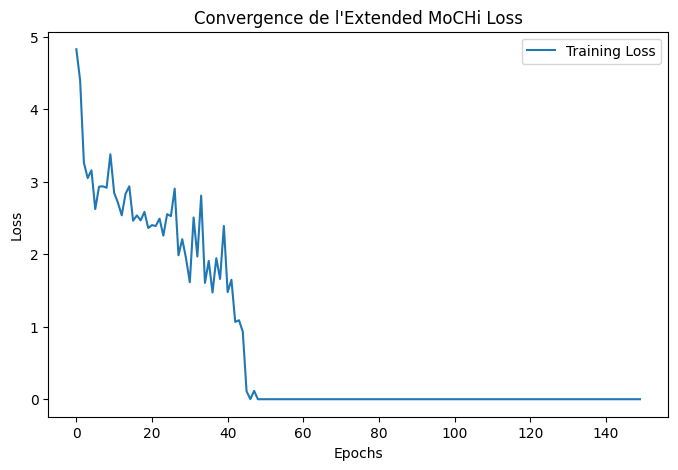


Similarité finale entre Node 1 et Node 5 : 0.1251


In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from wl import WLHierarchyEngine
from gin_encoder import GINEncoder
from graph_augmentor import GraphAugmentor
from dual_view_miner import DualViewMiner
from loss import ExtendedMoCHILoss

# ==========================================
# 1. SETUP & DATA
# ==========================================
nodes = [0, 1, 2, 3, 4, 5, 6, 7]
edges = [(0, 1), (0, 7), (1, 2), (7, 2), (2, 3), (2, 6), (3, 4), (6, 5), (4, 5)]

x = torch.eye(8) 
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

# ==========================================
# 2. INITIALIZE MODULES
# ==========================================
wl_engine = WLHierarchyEngine(nodes, edges)
wl_engine.build_wl_tree(force_convergence=True)

encoder = GINEncoder(input_dim=8, hidden_dim=32, output_dim=16)
optimizer = optim.Adam(encoder.parameters(), lr=0.01)

augmentor = GraphAugmentor(edge_drop_prob=0.2, feature_mask_prob=0.2)
miner = DualViewMiner(wl_engine, nodes, theta=0.5, delta=2)
criterion = ExtendedMoCHILoss(temperature=0.1, num_negatives=10)

# ==========================================
# 3. TRAINING LOOP
# ==========================================
encoder.train()

losses = [] # Pour tracer la courbe après
total_epochs = 150

print(f"--- Démarrage de l'entrainement sur {total_epochs} époques ---")

for epoch in range(total_epochs):
    # [IMPORTANT] Remise à zéro des gradients au début de CHAQUE tour
    optimizer.zero_grad() 

    # --- Step 1: Dynamic Mining (Mise à jour des candidats) ---
    # On le fait à chaque époque pour suivre l'évolution de l'encodeur
    # (Note: Sur des gros graphes, on le fait toutes les 5 ou 10 époques pour gagner du temps)
    with torch.no_grad():
        h_clean = encoder(x, edge_index)
        ext_pos_lists, hard_neg_lists = miner.mine_candidates(h_clean)

    # --- Step 2: Augmentations ---
    x1, edge_index1 = augmentor.augment(x, edge_index)
    x2, edge_index2 = augmentor.augment(x, edge_index)

    # --- Step 3: Forward Pass ---
    z1 = encoder(x1, edge_index1)
    z2 = encoder(x2, edge_index2)

    total_loss = 0

    # --- Step 4: Loss Calculation per Anchor ---
    for i in range(len(nodes)):
        anchor = z1[i].unsqueeze(0)
        
        # A. Positives (Vue 2 + Intersection Mining)
        pos_view2 = z2[i].unsqueeze(0)
        mined_pos_indices = ext_pos_lists[i]
        
        if len(mined_pos_indices) > 0:
            pos_extended = z2[mined_pos_indices]
            all_positives = torch.cat([pos_view2, pos_extended], dim=0)
        else:
            all_positives = pos_view2

        # B. Hard Negatives (XOR Mining)
        hard_neg_indices = hard_neg_lists[i]
        
        if len(hard_neg_indices) > 0:
            hard_negatives = z2[hard_neg_indices]
        else:
            hard_negatives = torch.tensor([]).to(x.device)

        # C. Compute Loss
        loss_i = criterion(anchor, all_positives, hard_negatives)
        total_loss += loss_i

    # Moyenne sur le batch
    final_loss = total_loss / len(nodes)
    
    # Backpropagation
    final_loss.backward()
    optimizer.step()
    
    losses.append(final_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{total_epochs} | Loss: {final_loss.item():.4f}")

# ==========================================
# 4. VISUALISATION DE LA LOSS
# ==========================================
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence de l'Extended MoCHi Loss")
plt.legend()
plt.show()

# Petit check final de similarité
encoder.eval()
with torch.no_grad():
    final_h = encoder(x, edge_index)
    # Vérifions si 1 et 5 (Frères WL mais distants géométriquement) se sont rapprochés
    # Indices : node 1 -> idx 1, node 5 -> idx 5
    sim = torch.nn.functional.cosine_similarity(final_h[1].unsqueeze(0), final_h[5].unsqueeze(0))
    print(f"\nSimilarité finale entre Node 1 et Node 5 : {sim.item():.4f}")